In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('aefi.csv')
df.head().T

,0,1,2,3,4
date,2021-01-13,2021-02-25,2021-02-26,2021-02-27,2021-02-28
vaxtype,astrazeneca,pfizer,pfizer,pfizer,pfizer
daily_total,5,1,2,4,12
daily_serious_npra,0,0,0,0,1
daily_nonserious,5,1,2,4,11
daily_nonserious_npra,5,1,2,4,11
daily_nonserious_mysj_dose1,0,0,0,0,0
daily_nonserious_mysj_dose2,0,0,0,0,0
d1_site_pain,0,0,0,0,0
d1_site_swelling,0,0,0,0,0


In [3]:
df['date'] = pd.to_datetime(df['date'])

start_date = '2021-05-05'
end_date = '2021-10-31'

df2 = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

print(df2)

          date      vaxtype  daily_total  daily_serious_npra  \
106 2021-05-05  astrazeneca          139                   0   
107 2021-05-05       pfizer         3901                  11   
108 2021-05-05      sinovac          424                   2   
109 2021-05-06  astrazeneca           95                   0   
110 2021-05-06       pfizer         2311                   4   
..         ...          ...          ...                 ...   
641 2021-10-30       pfizer          269                   0   
642 2021-10-30      sinovac           23                   1   
643 2021-10-31  astrazeneca          135                   0   
644 2021-10-31       pfizer          279                   2   
645 2021-10-31      sinovac           16                   0   

     daily_nonserious  daily_nonserious_npra  daily_nonserious_mysj_dose1  \
106               139                      0                          139   
107              3890                     86                         2017   


In [4]:
print(df2['vaxtype'].unique())

['astrazeneca' 'pfizer' 'sinovac']


In [5]:
ae_by_dose = df2.groupby('vaxtype')[['daily_nonserious_mysj_dose1', 'daily_nonserious_mysj_dose2']].sum()
print(ae_by_dose)

             daily_nonserious_mysj_dose1  daily_nonserious_mysj_dose2
vaxtype                                                              
astrazeneca                       383237                         3213
pfizer                            304430                        29195
sinovac                           171005                         8927


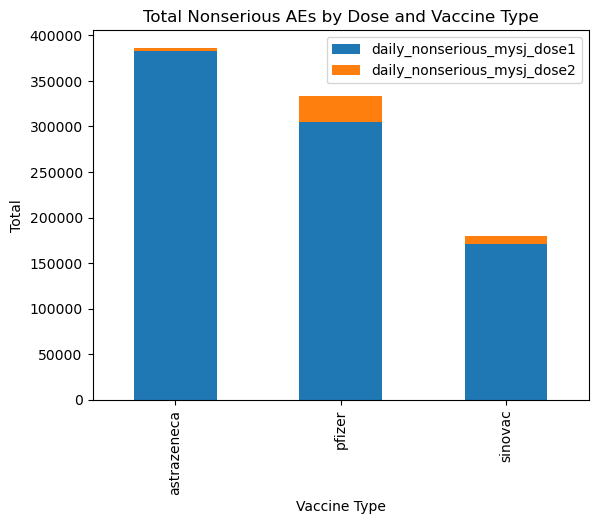

In [6]:
ae_by_dose.plot(kind='bar', stacked=True)
plt.xlabel('Vaccine Type')
plt.ylabel('Total')
plt.title('Total Nonserious AEs by Dose and Vaccine Type')
plt.show()

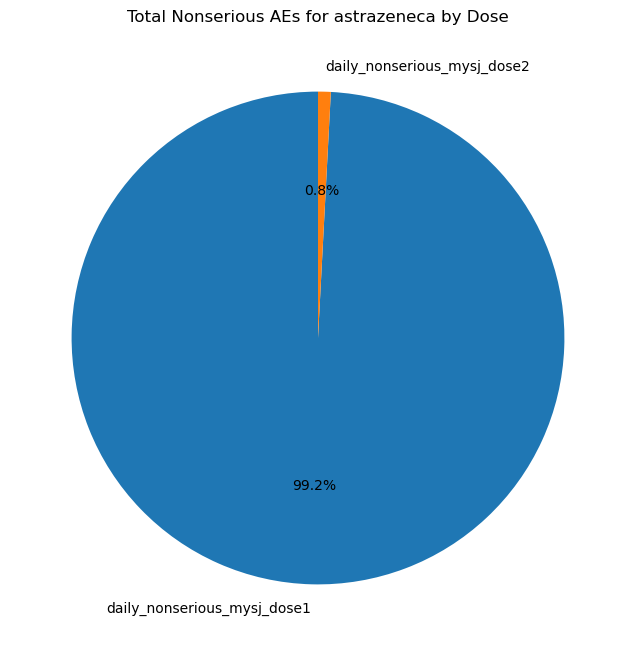

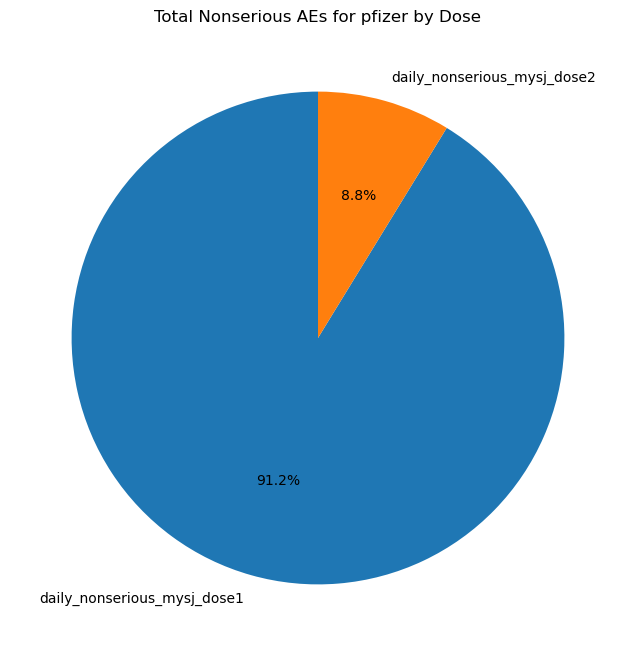

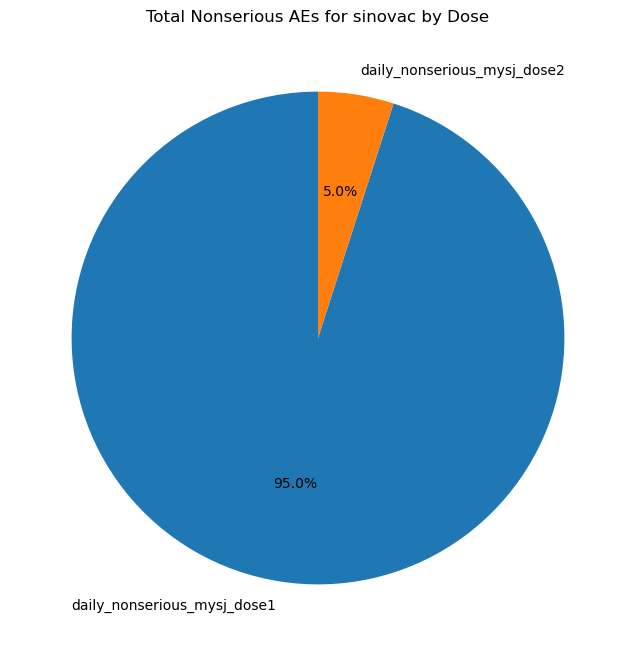

In [53]:
# plotting pie chart for each vaccine type
for vaccine_type in ae_by_dose.index:
    plt.figure(figsize=(8, 8))
    
    # select data for the current vaccine type
    data_for_vaccine_type = ae_by_dose.loc[vaccine_type]
    
    # plotting pie chart
    plt.pie(data_for_vaccine_type, labels=data_for_vaccine_type.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Total Nonserious AEs for {vaccine_type} by Dose')
    plt.show()

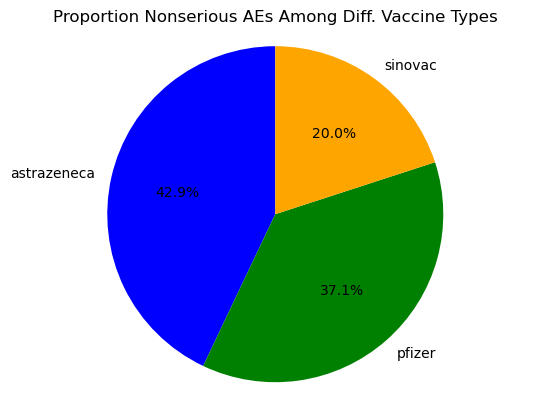

In [54]:
by_dose = ae_by_dose.groupby('vaxtype')[['daily_nonserious_mysj_dose1', 'daily_nonserious_mysj_dose2']].sum()

fig, ax = plt.subplots()
ax.pie(by_dose.sum(axis=1), labels=by_dose.index, autopct='%1.1f%%', startangle=90, colors=['blue','green', 'orange'])
ax.axis('equal')  

plt.title('Proportion Nonserious AEs Among Diff. Vaccine Types')
plt.show()

In [55]:
serious_nonserious = df2.groupby('vaxtype')[['daily_nonserious','daily_serious_npra']].sum()
print(serious_nonserious)

             daily_nonserious  daily_serious_npra
vaxtype                                          
astrazeneca            387413                 118
pfizer                 342630                 623
sinovac                183911                 509


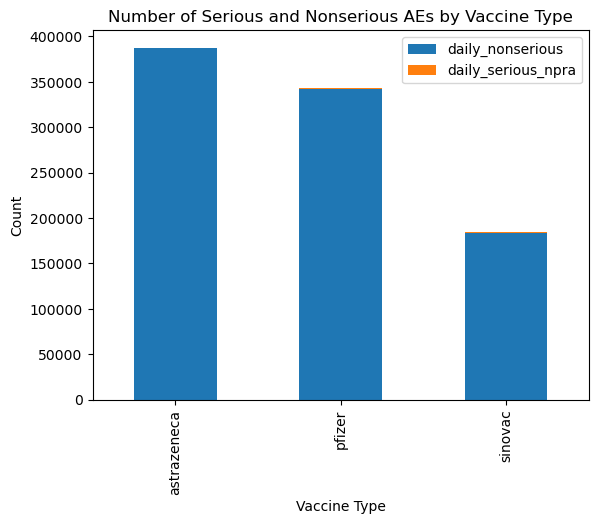

In [58]:
serious_nonserious.plot(kind='bar', stacked =True)
plt.xlabel('Vaccine Type')
plt.ylabel('Count')
plt.title('Number of Serious and Nonserious AEs by Vaccine Type')
plt.show()

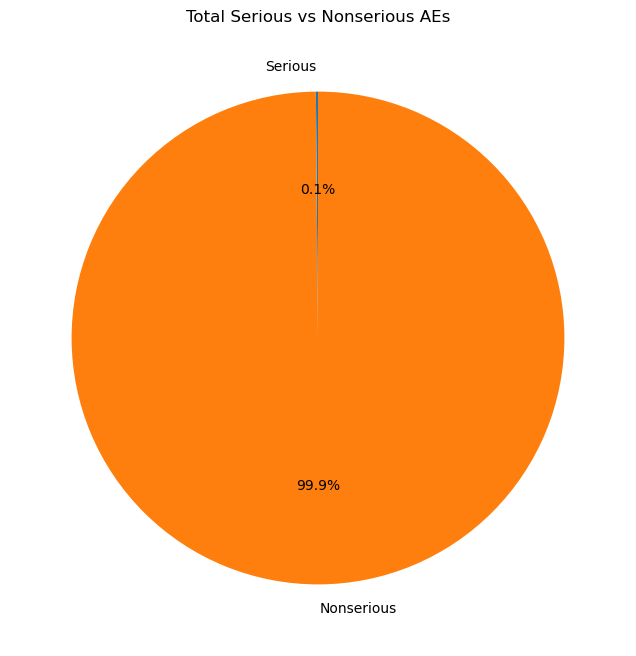

In [70]:
total_serious = df2['daily_serious_npra'].sum()
total_nonserious = df2['daily_nonserious'].sum()

# plotting pie chart for serious vs nonserious
plt.figure(figsize=(8, 8))
plt.pie([total_serious, total_nonserious], labels=['Serious', 'Nonserious'], autopct='%1.1f%%', startangle=90)
plt.title('Total Serious vs Nonserious AEs')
plt.show()

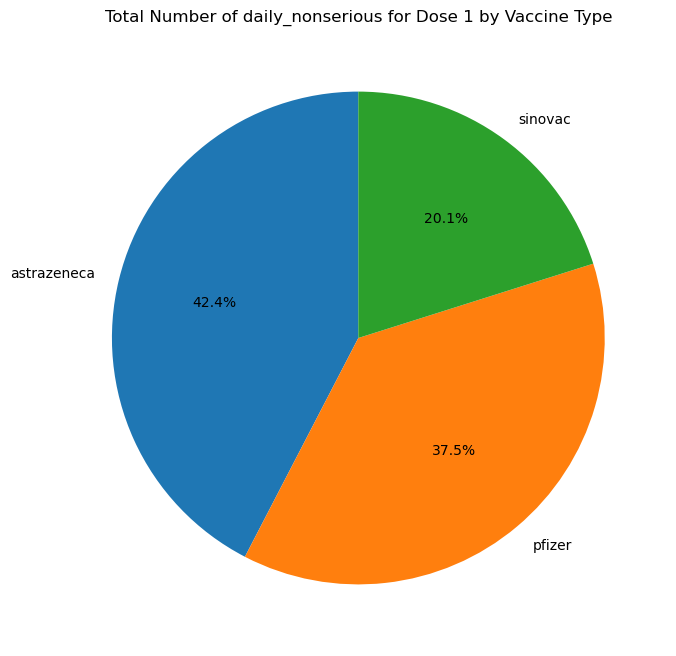

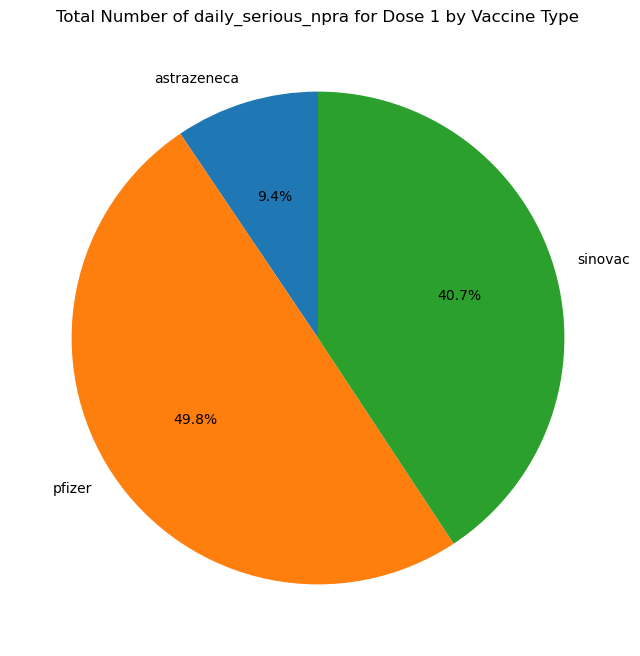

In [71]:
conditions = ['daily_nonserious','daily_serious_npra']

# group by 'vaxtype' and sum the symptoms for dose 1
ae_type = df2.groupby('vaxtype')[conditions].sum()

# plotting pie chart for each symptom
for condition in conditions:
    plt.figure(figsize=(8, 8))
    plt.pie(ae_type[condition], labels=ae_type.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Total Number of {condition} for Dose 1 by Vaccine Type')
    plt.show()

In [7]:
symptoms = ['d1_site_pain', 'd1_site_swelling', 'd1_site_redness', 'd1_tiredness', 'd1_headache', 'd1_muscle_pain', 'd1_joint_pain', 'd1_weakness', 'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash']
dose1_symptoms = df2.groupby('vaxtype')[symptoms].sum()
print(dose1_symptoms)

             d1_site_pain  d1_site_swelling  d1_site_redness  d1_tiredness  \
vaxtype                                                                      
astrazeneca        289330             72012            25867        246340   
pfizer             237386             58747            14789        137156   
sinovac             81390              9657             4771         87508   

             d1_headache  d1_muscle_pain  d1_joint_pain  d1_weakness  \
vaxtype                                                                
astrazeneca       234481          175824         127923       195464   
pfizer            109604           74794          38762        73671   
sinovac            73902           37546          23882        45296   

             d1_fever  d1_vomiting  d1_chills  d1_rash  
vaxtype                                                 
astrazeneca    242866        52369     187046    10784  
pfizer          39697        27639      30047     9012  
sinovac         2315

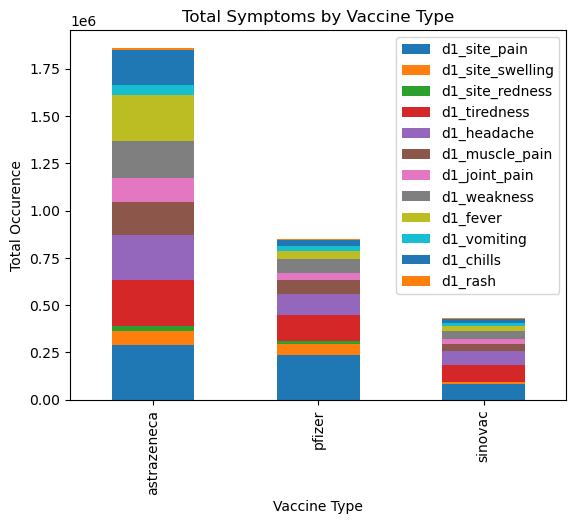

In [8]:
dose1_symptoms.plot(kind='bar', stacked= True)
plt.xlabel("Vaccine Type")
plt.ylabel("Total Occurence")
plt.title("Total Symptoms by Vaccine Type")
plt.show()

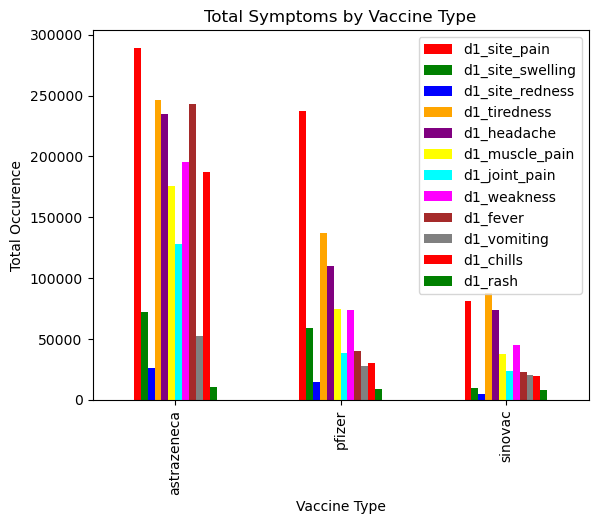

In [9]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray']

dose1_symptoms.plot(kind='bar', color=colors)
plt.xlabel("Vaccine Type")
plt.ylabel("Total Occurence")
plt.title("Total Symptoms by Vaccine Type")
plt.show()

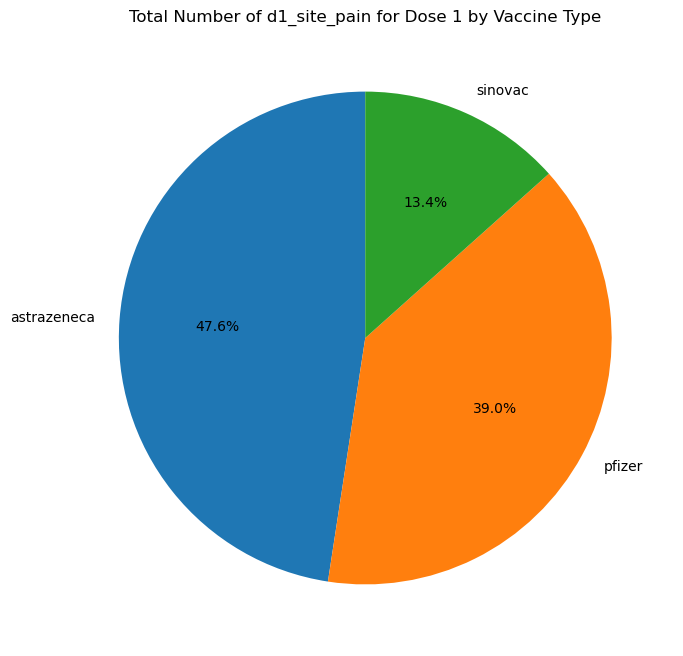

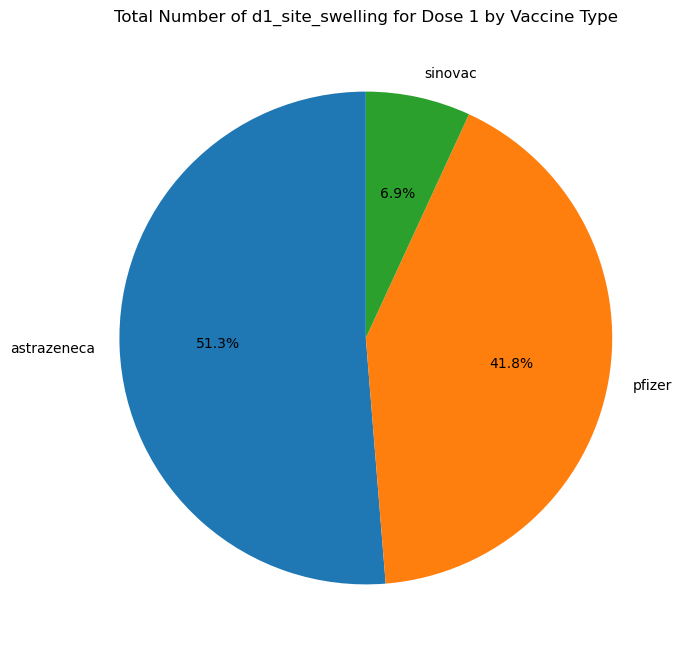

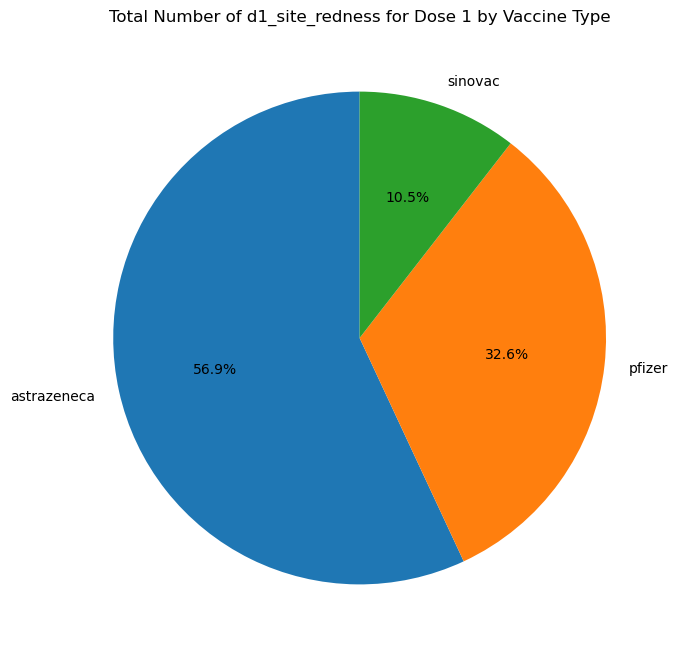

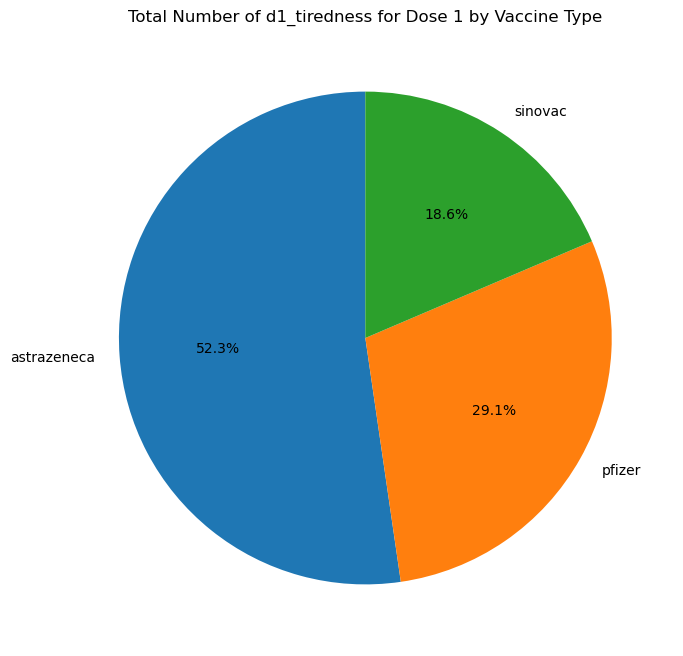

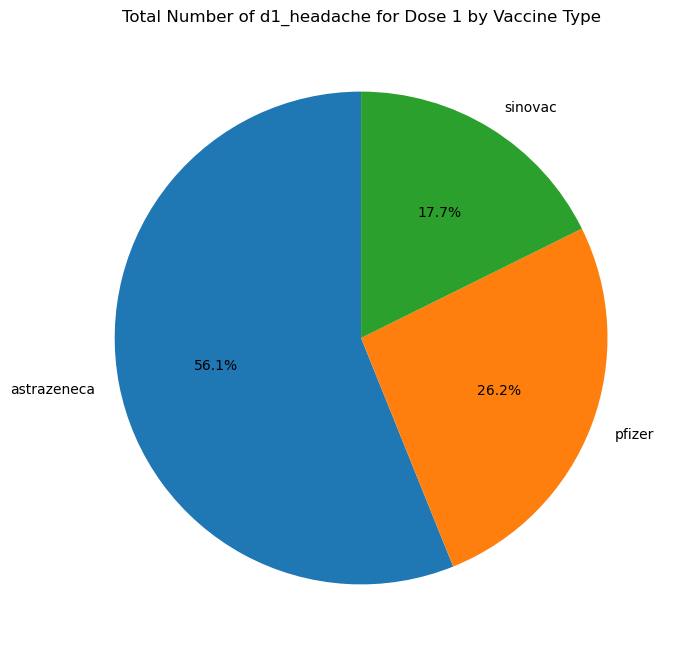

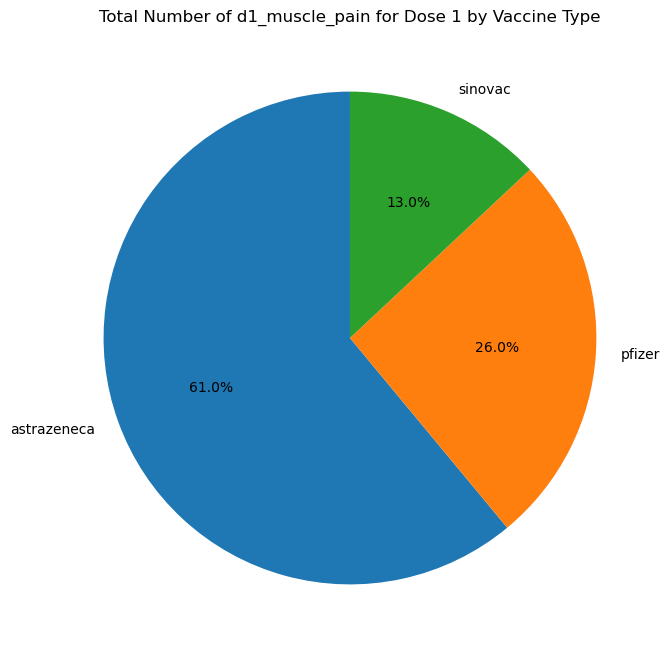

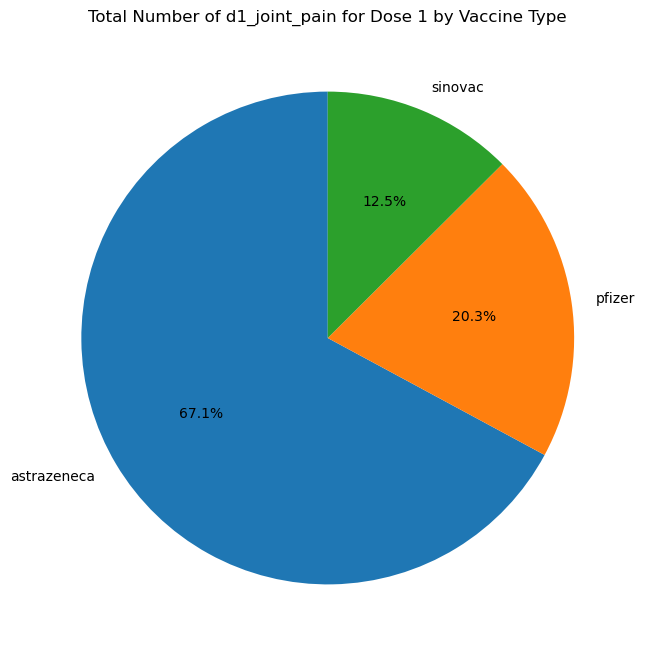

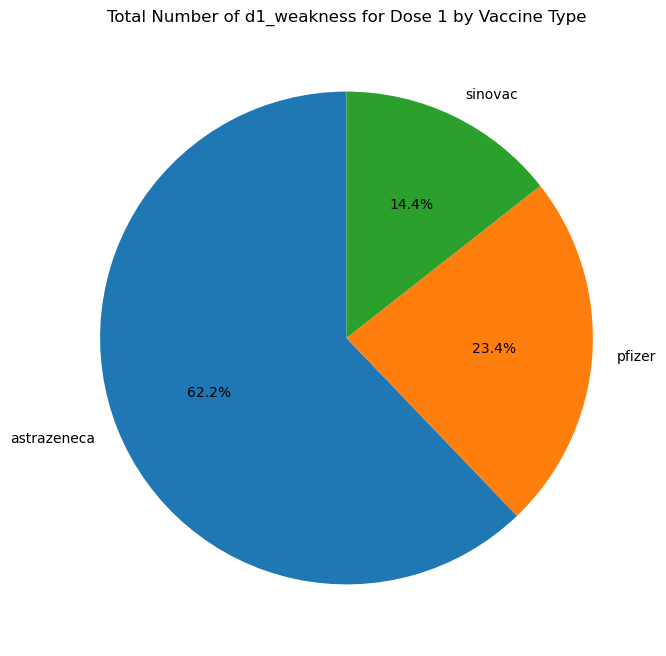

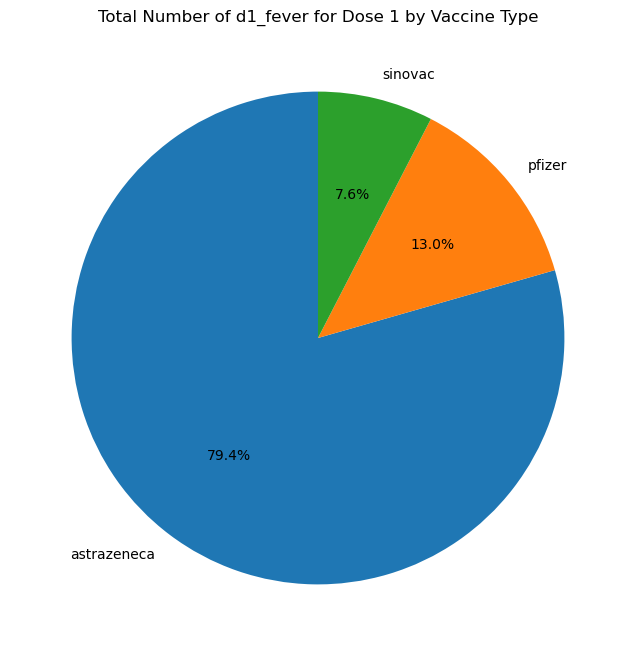

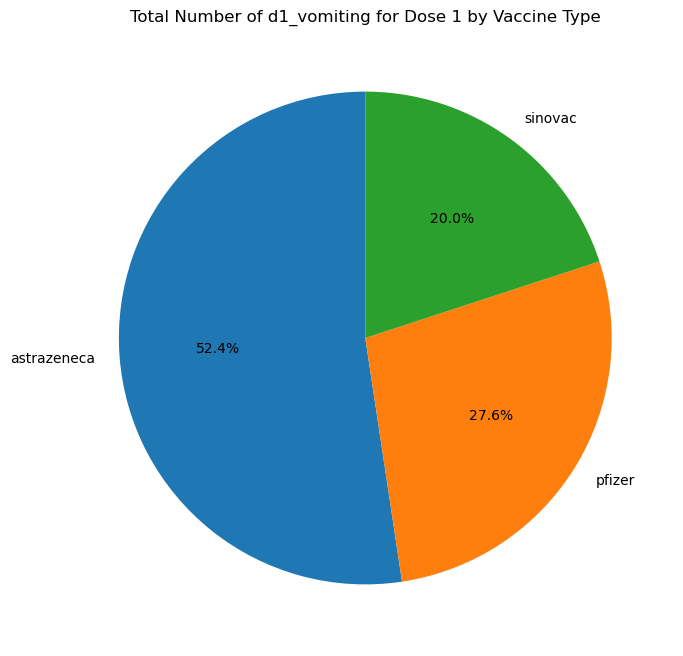

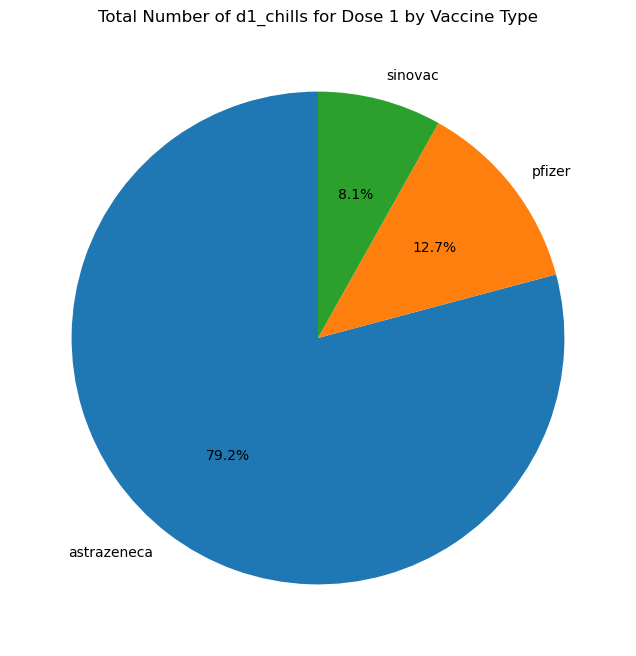

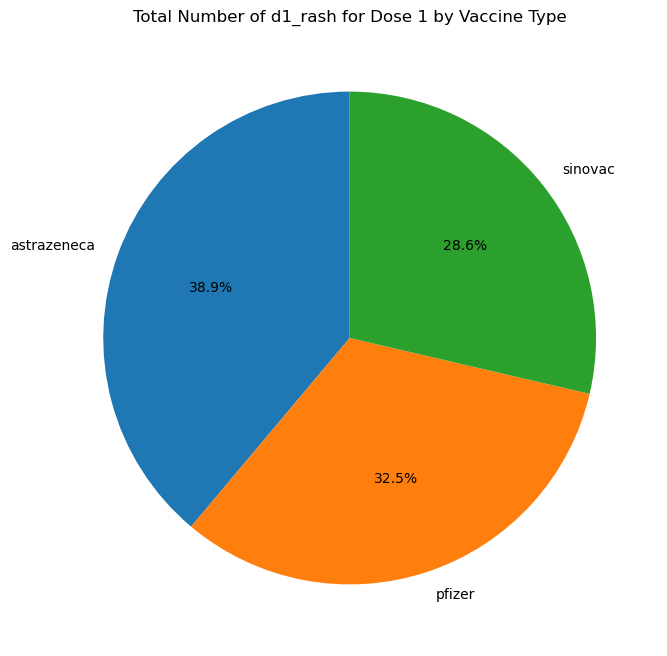

In [46]:
symptoms = ['d1_site_pain', 'd1_site_swelling', 'd1_site_redness', 'd1_tiredness', 'd1_headache', 'd1_muscle_pain', 'd1_joint_pain', 'd1_weakness', 'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash']

# group by 'vaxtype' and sum the symptoms for dose 1
dose1_symptoms = df2.groupby('vaxtype')[symptoms].sum()

# plotting pie chart for each symptom
for symptom in symptoms:
    plt.figure(figsize=(8, 8))
    plt.pie(dose1_symptoms[symptom], labels=dose1_symptoms.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Total Number of {symptom} for Dose 1 by Vaccine Type')
    plt.show()

In [10]:
print(df2.columns)

Index(['date', 'vaxtype', 'daily_total', 'daily_serious_npra',
       'daily_nonserious', 'daily_nonserious_npra',
       'daily_nonserious_mysj_dose1', 'daily_nonserious_mysj_dose2',
       'd1_site_pain', 'd1_site_swelling', 'd1_site_redness', 'd1_tiredness',
       'd1_headache', 'd1_muscle_pain', 'd1_joint_pain', 'd1_weakness',
       'd1_fever', 'd1_vomiting', 'd1_chills', 'd1_rash', 'd2_site_pain',
       'd2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache',
       'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness', 'd2_fever',
       'd2_vomiting', 'd2_chills', 'd2_rash'],
      dtype='object')


In [11]:
symptoms2 = ['d2_site_pain',
       'd2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache',
       'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness', 'd2_fever',
       'd2_vomiting', 'd2_chills', 'd2_rash']
dose2_symptoms = df2.groupby('vaxtype')[symptoms2].sum()
print(dose2_symptoms)

             d2_site_pain  d2_site_swelling  d2_site_redness  d2_tiredness  \
vaxtype                                                                      
astrazeneca          2273               416              154          1551   
pfizer              21649              5522             1717         13648   
sinovac              5321               768              434          4084   

             d2_headache  d2_muscle_pain  d2_joint_pain  d2_weakness  \
vaxtype                                                                
astrazeneca         1384             780            492          915   
pfizer             10998            7606           4205         7799   
sinovac             3748            1948           1210         2204   

             d2_fever  d2_vomiting  d2_chills  d2_rash  
vaxtype                                                 
astrazeneca       637          344        520       77  
pfizer           4530         3249       3634      996  
sinovac           92

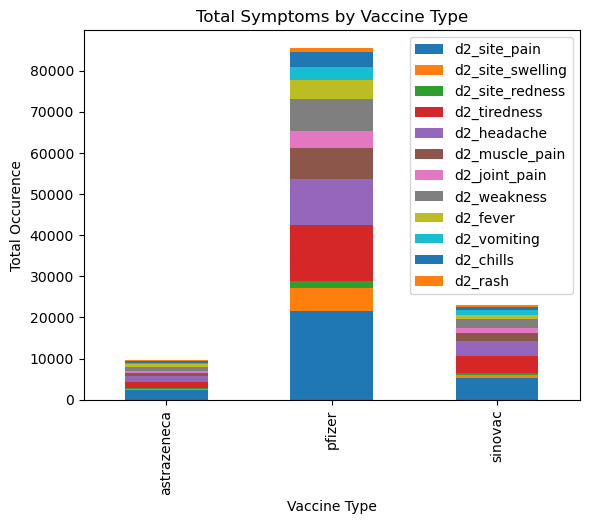

In [12]:
dose2_symptoms.plot(kind='bar', stacked= True)
plt.xlabel("Vaccine Type")
plt.ylabel("Total Occurence")
plt.title("Total Symptoms by Vaccine Type")
plt.show()

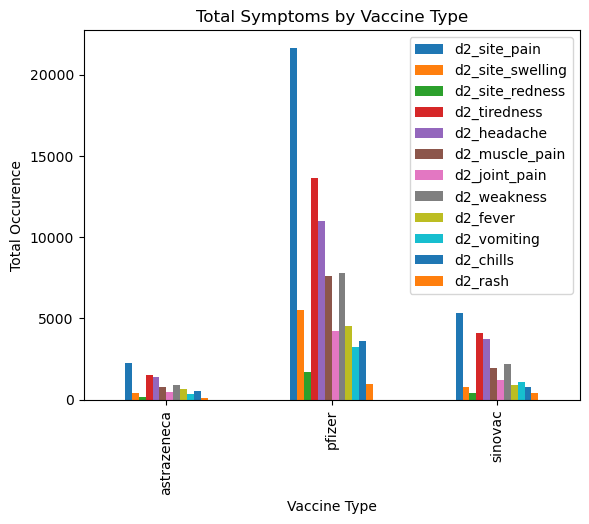

In [13]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray']

dose2_symptoms.plot(kind='bar')
plt.xlabel("Vaccine Type")
plt.ylabel("Total Occurence")
plt.title("Total Symptoms by Vaccine Type")
plt.show()

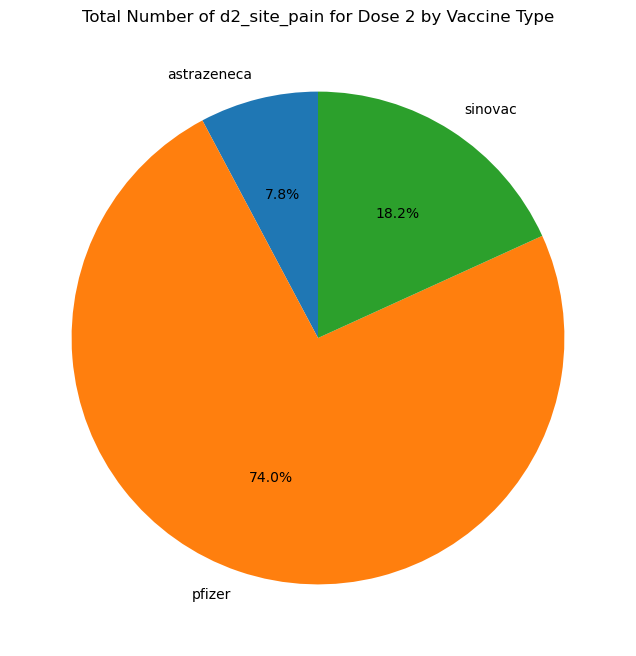

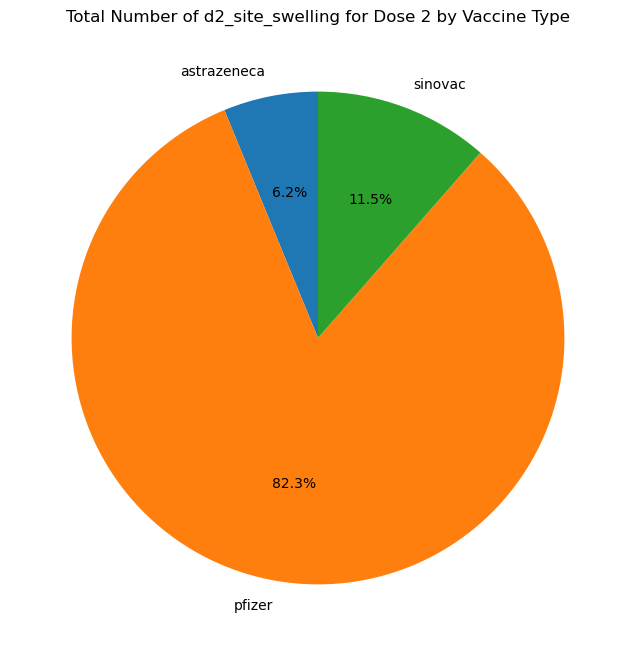

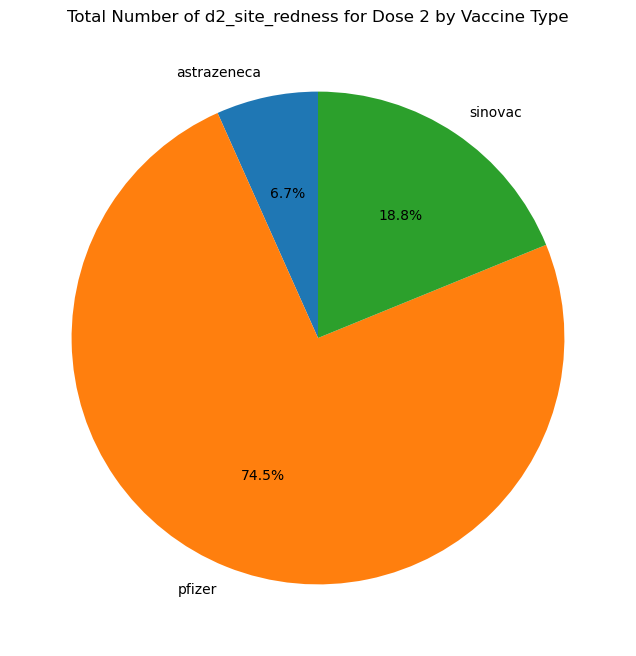

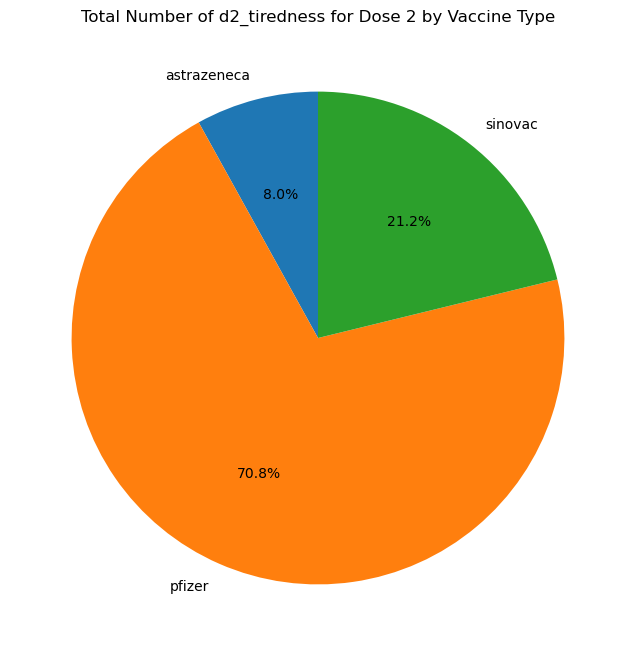

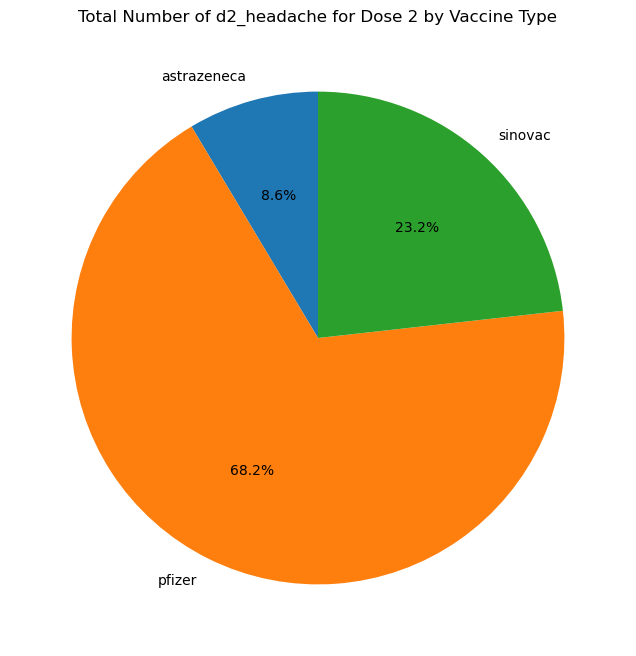

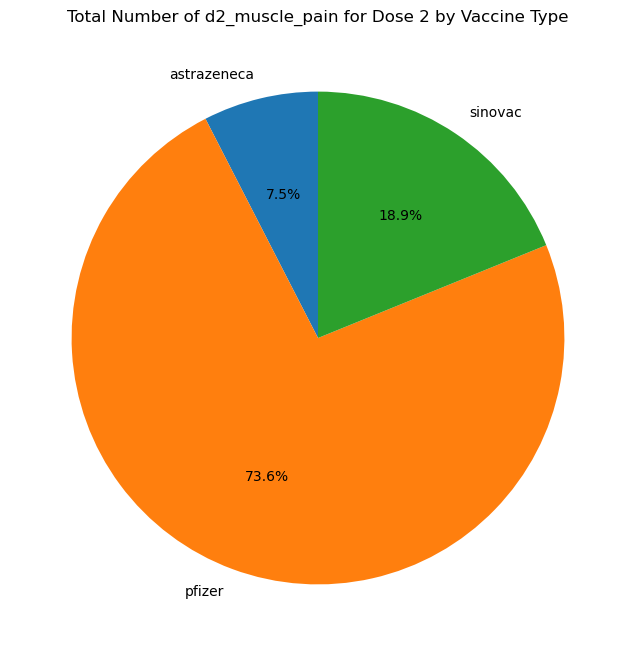

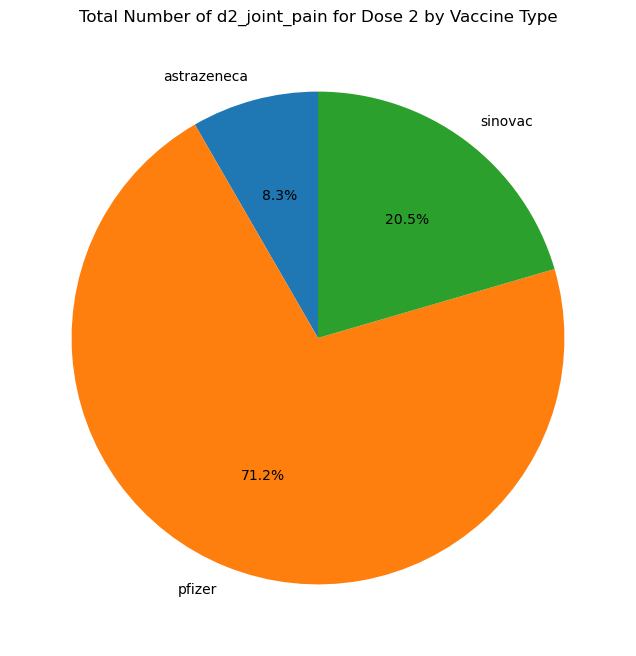

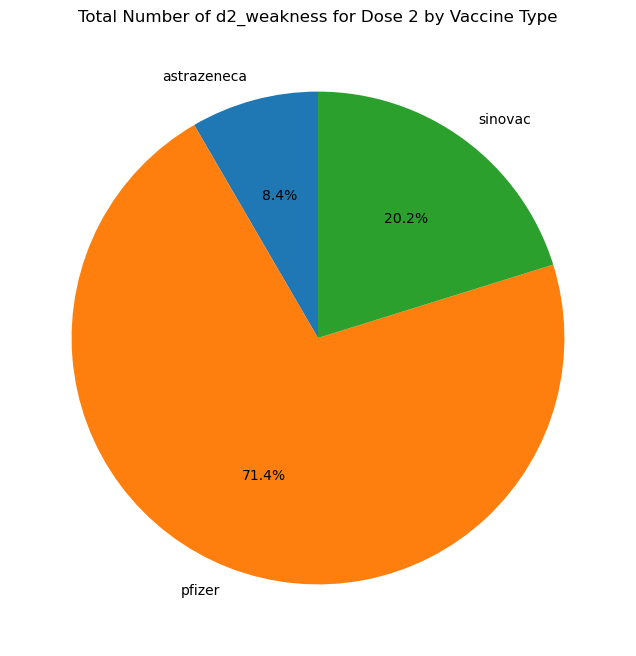

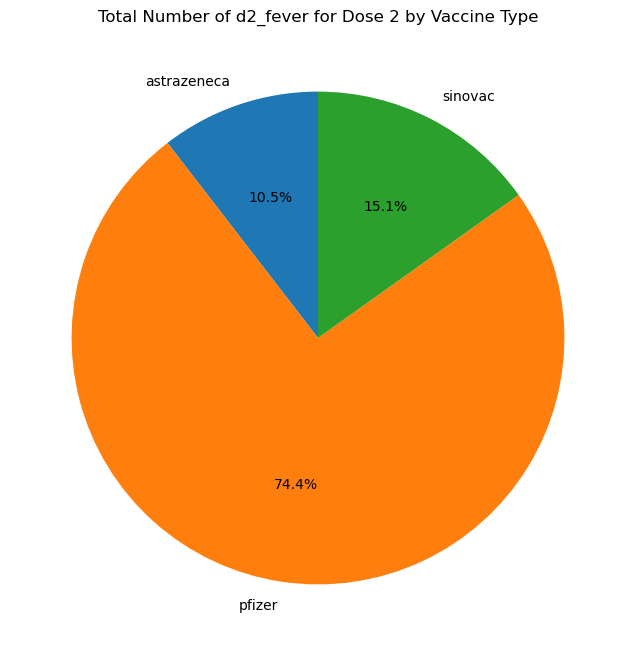

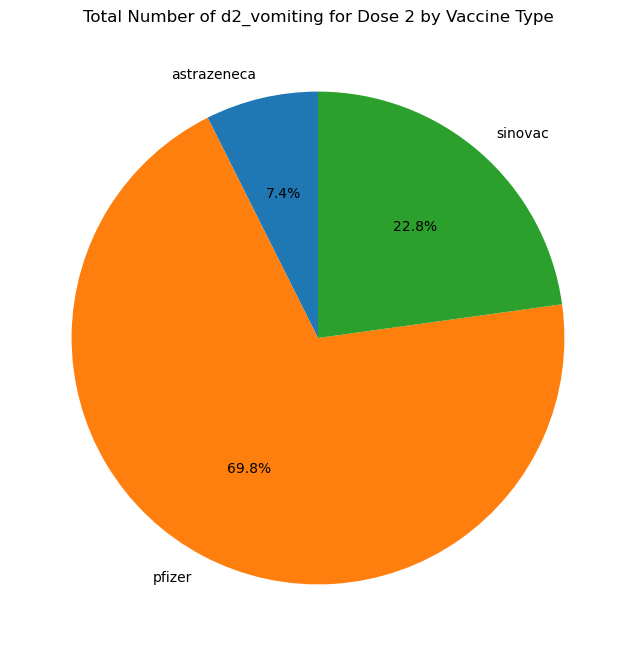

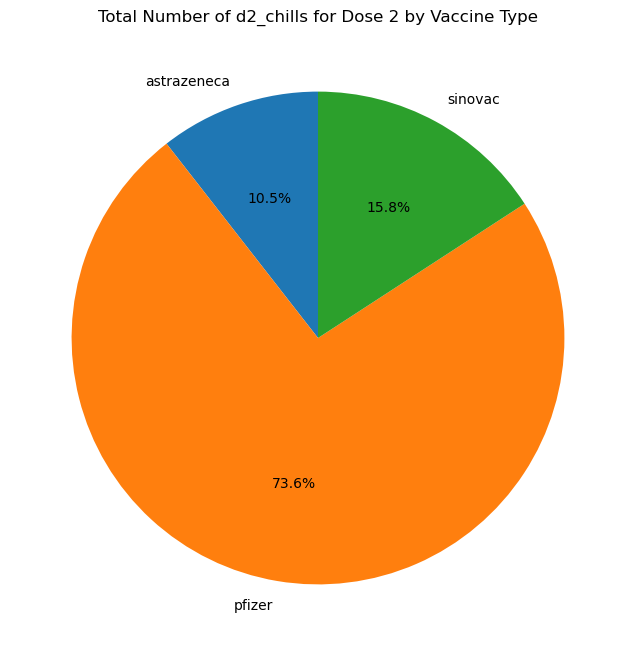

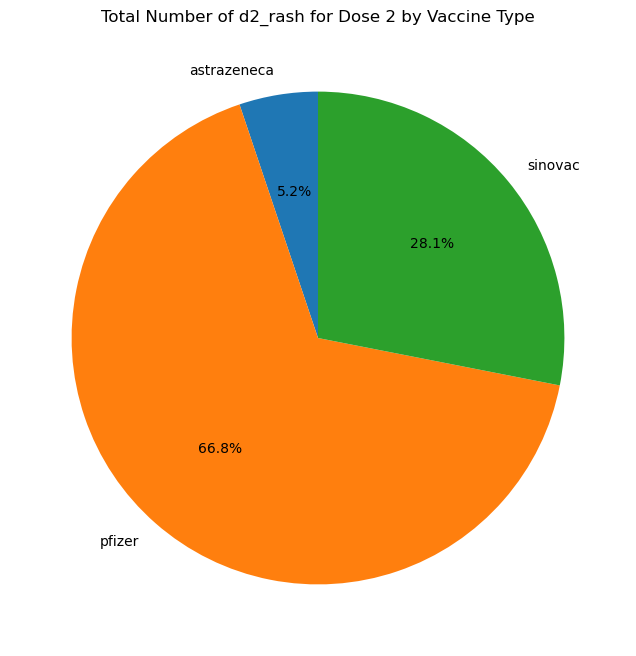

In [52]:
symptoms2 = ['d2_site_pain',
       'd2_site_swelling', 'd2_site_redness', 'd2_tiredness', 'd2_headache',
       'd2_muscle_pain', 'd2_joint_pain', 'd2_weakness', 'd2_fever',
       'd2_vomiting', 'd2_chills', 'd2_rash']

# group by 'vaxtype' and sum the symptoms for dose 2
dose2_symptoms = df2.groupby('vaxtype')[symptoms2].sum()

# plotting pie chart for each symptom
for symptom in symptoms2:
    plt.figure(figsize=(8, 8))
    plt.pie(dose2_symptoms[symptom], labels=dose2_symptoms.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Total Number of {symptom} for Dose 2 by Vaccine Type')
    plt.show()

In [16]:
my_df = pd.read_csv('vax_malaysia.csv')
my_df.head().T

,0,1,2,3,4
date,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28
daily_partial,66,1150,4113,6722,6720
daily_full,3,2,3,6,6
daily_booster,0,0,0,0,0
daily_booster2,0,0,0,0,0
daily,69,1152,4116,6728,6726
daily_partial_adol,0,0,1,0,0
daily_full_adol,0,0,0,0,1
daily_booster_adol,0,0,0,0,0
daily_booster2_adol,0,0,0,0,0


In [17]:
my_df.drop(['daily_partial', 'daily_full', 'daily_booster', 'daily_booster2','daily',
                   'daily_partial_adol', 'daily_full_adol', 'daily_booster_adol','daily_booster2_adol'
                   ,'daily_partial_child', 'daily_full_child', 'daily_booster_child',
                   'daily_booster2_child', 'cumul_partial', 'cumul_full', 'cumul_booster',
                   'cumul_booster2', 'cumul', 'cumul_partial_adol', 'cumul_full_adol',
                   'cumul_booster_adol','cumul_booster2_adol','cumul_partial_child','cumul_full_child',
                   'cumul_booster_child','cumul_booster2_child','pfizer3','pfizer4','sinovac3','sinovac4',
                   'astra3', 'astra4','sinopharm1','sinopharm2','sinopharm3','sinopharm4','cansino', 'cansino3','cansino4'
                   ,'pending1','pending2','pending3','pending4'], axis=1, inplace=True)
print(my_df)

           date  pfizer1  pfizer2  sinovac1  sinovac2  astra1  astra2
0    2021-02-24       65        1         0         2       0       0
1    2021-02-25     1147        0         0         2       0       0
2    2021-02-26     4105        1         0         2       1       0
3    2021-02-27     6700        1         1         5       0       0
4    2021-02-28     6716        2         0         4       0       0
..          ...      ...      ...       ...       ...     ...     ...
985  2023-11-06        3        0         1         0       0       0
986  2023-11-07        0        0         3         0       0       0
987  2023-11-08        2        0         2         3       0       0
988  2023-11-09        2       13         1         1       0       0
989  2023-11-10        1        2         0         3       0       0

[990 rows x 7 columns]


In [18]:
my_df.to_csv('total_vax.csv')

In [20]:
my_df['date'] = pd.to_datetime(my_df['date'])

start_date = '2021-05-05'
end_date = '2021-10-31'

my_df2 = my_df[(my_df['date'] >= start_date) & (my_df['date'] <= end_date)]

print(my_df2)

          date  pfizer1  pfizer2  sinovac1  sinovac2  astra1  astra2
70  2021-05-05    22192    19742      5339      3175    4619       0
71  2021-05-06    26292    13812      7222      4980    3595       0
72  2021-05-07    17416    11280     11371      4217    3589       0
73  2021-05-08    12351     7122      2718      1326    3654       1
74  2021-05-09    17349     5834      4975       771    3611       0
..         ...      ...      ...       ...       ...     ...     ...
245 2021-10-27    17373   117262      1971      5941       5    3906
246 2021-10-28    17632   110531      1966      5792       7    3124
247 2021-10-29    13326    77410      2003      4319       1    1932
248 2021-10-30     5122    43820      1863      3199       0    4251
249 2021-10-31     4824    36324      1576      2232       1    5001

[180 rows x 7 columns]


pfizer1     12538906
pfizer2     12163236
sinovac1     9991875
sinovac2     9866344
astra1       2043181
astra2       1994827
dtype: int64


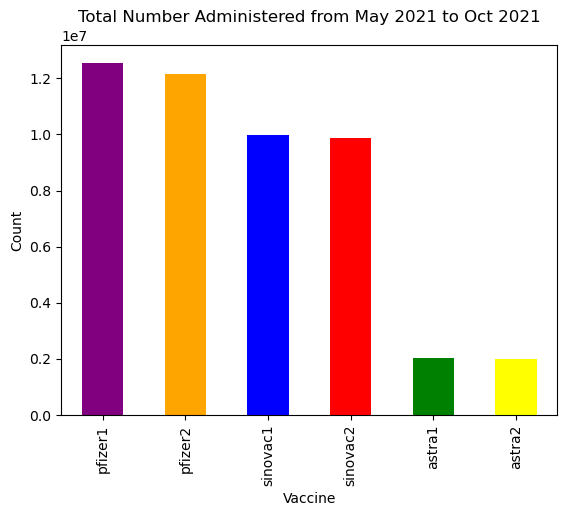

In [21]:
colors=['purple', 'orange', 'blue','red', 'green','yellow']
df2_sum = my_df2.drop(columns='date').sum()
print(df2_sum)
df2_sum.plot(kind='bar', color = colors)
plt.xlabel('Vaccine')
plt.ylabel('Count')
plt.title('Total Number Administered from May 2021 to Oct 2021')
plt.show()

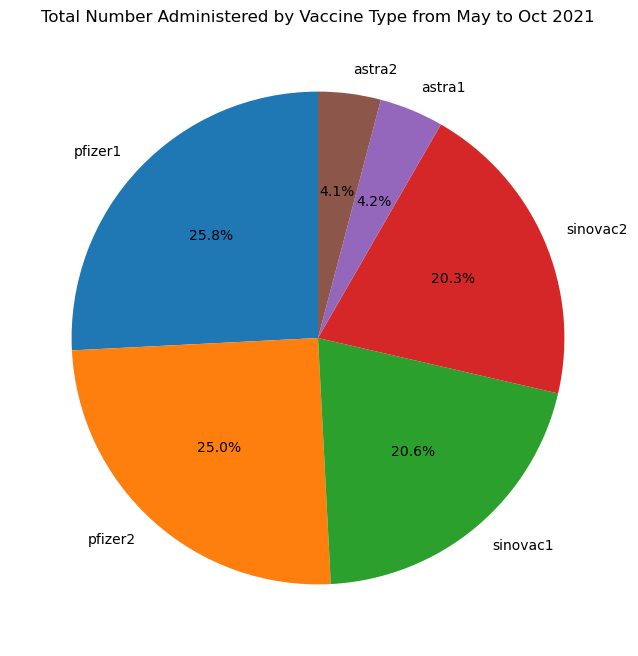

In [42]:
sums = my_df2.drop(columns='date').sum()

plt.figure(figsize=(8, 8))
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Number Administered by Vaccine Type from May to Oct 2021')
plt.show()